# Citizen activation probability for Valeria Card Kingdom Harvest Phase

In [3]:
# Setup
import random
N = 100000

import matplotlib.pyplot as plt

## Normal single die distribution

In [4]:
normal_results = []

for i in range(N):
    normal_die = random.randint(1,6)
    
    normal_results.append(normal_die)

d = {x:normal_results.count(x)/N  for x in set(normal_results)}
print(d)

{1: 0.16442, 2: 0.16596, 3: 0.16846, 4: 0.16604, 5: 0.16735, 6: 0.16777}


[(1, 0.16442), (2, 0.16596), (3, 0.16846), (4, 0.16604), (5, 0.16735), (6, 0.16777)]


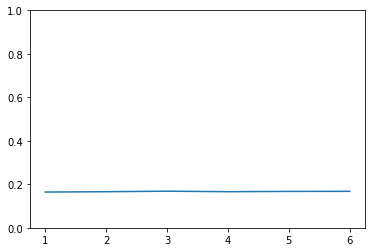

In [5]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

A Citizen is activated when its activation number is matched by either

* the first die,
* the second die,
* the sum of the two dice

## Normal two dice distribution

In [6]:
normal_results = []

for i in range(N):
    normal_dice = [random.randint(1,6), random.randint(1,6)]
    
    normal_results.append(normal_dice[0] + normal_dice[1])

d = {x:normal_results.count(x)/N for x in set(normal_results)}
print(d)

{2: 0.02818, 3: 0.05445, 4: 0.08322, 5: 0.10857, 6: 0.13967, 7: 0.16755, 8: 0.1395, 9: 0.11189, 10: 0.08428, 11: 0.05572, 12: 0.02697}


[(2, 0.02818), (3, 0.05445), (4, 0.08322), (5, 0.10857), (6, 0.13967), (7, 0.16755), (8, 0.1395), (9, 0.11189), (10, 0.08428), (11, 0.05572), (12, 0.02697)]


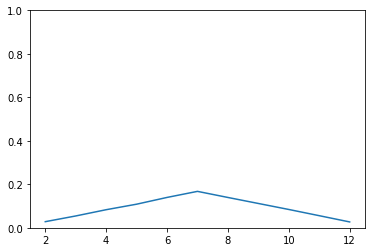

In [7]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

## Two dice, count single die result or sum

In [8]:
results = []

for i in range(100000):
    dice = [ random.randint(1, 6), random.randint(1,6)]

    result = [ dice[0], dice[1], dice[0]+dice[1]]
    
    results.append(result)

In [9]:
flat_results = [item for sublist in results for item in sublist]


d = {x:flat_results.count(x)/N for x in set(flat_results)}

print(d)

{1: 0.33412, 2: 0.35956, 3: 0.3913, 4: 0.41781, 5: 0.44338, 6: 0.47082, 7: 0.16795, 8: 0.1369, 9: 0.1127, 10: 0.08375, 11: 0.05383, 12: 0.02788}


[(1, 0.33412), (2, 0.35956), (3, 0.3913), (4, 0.41781), (5, 0.44338), (6, 0.47082), (7, 0.16795), (8, 0.1369), (9, 0.1127), (10, 0.08375), (11, 0.05383), (12, 0.02788)]


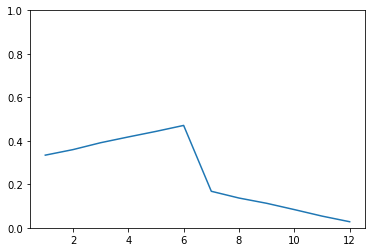

In [10]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

## Citizens with double activation

Citizens like *Paladin* and *Butcher* activate with double results, 9/10 and 11/12 respectively.

In [11]:
# Paladin activates with 9/10
d[9] = d[9] + d[10]
d[10] = d[9]

# Butcher activates with 11/12
d[11] = d[11] + d[12]
d[12] = d[11]

print(d)

{1: 0.33412, 2: 0.35956, 3: 0.3913, 4: 0.41781, 5: 0.44338, 6: 0.47082, 7: 0.16795, 8: 0.1369, 9: 0.19645, 10: 0.19645, 11: 0.08171, 12: 0.08171}


[(1, 0.33412), (2, 0.35956), (3, 0.3913), (4, 0.41781), (5, 0.44338), (6, 0.47082), (7, 0.16795), (8, 0.1369), (9, 0.19645), (10, 0.19645), (11, 0.08171), (12, 0.08171)]


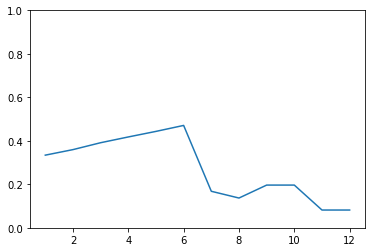

In [12]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

## Strategy simulation

### 666

In [13]:
test_values = [6,6,7]

scores = []

for r in range(100000):
    
    dice = [random.randint(1,6), random.randint(1,6)]
    
    dice.append(dice[0]+dice[1])
    
    scores.append(sum([test_values.count(i) for i in dice if i in test_values]))

import numpy
print(numpy.mean(scores))

1.12003


In [14]:
from itertools import product
import numpy

a = product([1,2,3,4,5,6,7,8,9,10,11,12], [1,2,3,4,5,6,7,8,9,10,11,12], [1,2,3,4,5,6,7,8,9,10,11,12])


total = []
for test_values in a:
    
    scores = []
    for r in range(10000):
    
        dice = [random.randint(1,6), random.randint(1,6)]

        dice.append(dice[0]+dice[1])

        scores.append(sum([test_values.count(i) for i in dice if i in test_values]))
        
    t = ((test_values), numpy.mean(scores))
    total.append(t)

In [15]:
t = sorted(total, key=lambda k: k[1])[::-1]

print(t[:10])

[((6, 6, 6), 1.4325), ((6, 5, 6), 1.397), ((6, 6, 5), 1.3967), ((6, 5, 5), 1.3746), ((5, 6, 6), 1.3742), ((5, 5, 6), 1.3673), ((6, 4, 6), 1.3537), ((4, 6, 6), 1.3517), ((6, 6, 4), 1.3423), ((6, 4, 5), 1.3417)]
